In [1]:
%reset -fs

import pandas as pd
import numpy as np
from sklearn import metrics

# from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns


matplotlib.use('TkAgg')
%matplotlib inline
# pd.set_option('max_columns', 100)
pd.set_option("display.max_colwidth", 1)

In [2]:
df = pd.read_csv('tweets_01-08-2021.csv', encoding='utf-8')

In [3]:
len(df)

56571

In [4]:
df.head(30)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created our economic problems.,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,"I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y",f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,"The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it. Almost all recent elections using this system, even though much smaller &amp; with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp; Fraud!",f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of events here about Comey's apparent leaking to compliant media. If you read those articles and tho…,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
5,1217962723234983937,RT @WhiteHouse: President @realDonaldTrump announced historic steps to protect the Constitutional right to pray in public schools! https://…,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f
6,1223640662689689602,Getting a little exercise this morning! https://t.co/fyAAcbhbgk,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f
7,1319501865625784320,https://t.co/4qwCKQOiOw,f,f,Twitter for iPhone,130822,19127,2020-10-23 04:52:14,f
8,1319500520126664705,https://t.co/VlEu8yyovv,f,f,Twitter for iPhone,153446,20275,2020-10-23 04:46:53,f
9,1319500501269041154,https://t.co/z5CRqHO8vg,f,f,Twitter for iPhone,102150,14815,2020-10-23 04:46:49,f


In [5]:
#tweet lookup
df_lookup = df.copy()

In [6]:
# tweet index lookup
df_lookup.loc[869]

id           1321069161917915140                                                                                                        
text         Rose is a disaster for New York. Not listened to, or respected, in Washington. A puppet for Pelosi! https://t.co/lvs7UnC2bI
isRetweet    f                                                                                                                          
isDeleted    f                                                                                                                          
device       Twitter for iPhone                                                                                                         
favorites    30302                                                                                                                      
retweets     6376                                                                                                                       
date         2020-10-27 12:40:07         

In [7]:
df.groupby('isFlagged').count()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
isFlagged,,,,,,,,
f,56267,56267,56267,56267,56267,56267,56267,56267
t,304,304,304,304,304,304,304,304


In [8]:
# Text preprocessing steps - remove numbers, URL, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub(r'[^\w\s]', ' ',str(x).lower())
no_url = lambda x: re.sub(r'http\S+', '', x)
clean = lambda x: x.replace('\n', '')
english_only = lambda string: re.sub(r'[^\x00-\x7f]', "", string)

df['text'] = df.text.map(alphanumeric).map(no_url).map(punc_lower).map(clean).map(english_only)
df.head(50)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
5,1217962723234983937,rt whitehouse president realdonaldtrump announced historic steps to protect the constitutional right to pray in public schools,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f
6,1223640662689689602,getting a little exercise this morning,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f
7,1319501865625784320,,f,f,Twitter for iPhone,130822,19127,2020-10-23 04:52:14,f
8,1319500520126664705,,f,f,Twitter for iPhone,153446,20275,2020-10-23 04:46:53,f
9,1319500501269041154,,f,f,Twitter for iPhone,102150,14815,2020-10-23 04:46:49,f


In [9]:
df['text'] = df['text'].apply(lambda x: x.strip()).replace('', np.nan) # fill empty cells w/ Null values

In [10]:
df.head(50)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
5,1217962723234983937,rt whitehouse president realdonaldtrump announced historic steps to protect the constitutional right to pray in public schools,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f
6,1223640662689689602,getting a little exercise this morning,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f
7,1319501865625784320,NaN,f,f,Twitter for iPhone,130822,19127,2020-10-23 04:52:14,f
8,1319500520126664705,NaN,f,f,Twitter for iPhone,153446,20275,2020-10-23 04:46:53,f
9,1319500501269041154,NaN,f,f,Twitter for iPhone,102150,14815,2020-10-23 04:46:49,f


In [11]:
df = df.dropna() #drop null rows
df.head(50)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
5,1217962723234983937,rt whitehouse president realdonaldtrump announced historic steps to protect the constitutional right to pray in public schools,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f
6,1223640662689689602,getting a little exercise this morning,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f
11,1319496349092511744,rt erictrump,t,f,Twitter for iPhone,0,8921,2020-10-23 04:30:19,f
12,1236502342121541632,rt gopchairwoman the economic boom continues jobs added in february jobs added since realdonaldtrump was electedunemploym,t,f,Twitter for iPhone,0,8681,2020-03-08 04:01:46,f
13,1225835449379258368,rt tomfitton vindman s behavior is a scandal he should be removed from the realdonaldtrump white house asap to protect our foreign poli,t,f,Twitter for iPhone,0,7679,2020-02-07 17:35:20,f


In [12]:
from datetime import datetime as dt

In [13]:
df["date"] = pd.to_datetime(df.date , format="%Y/%m/%d %H:%M:%S") #create date_time column

# Topic Modeling

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

from corextopic import corextopic as ct
# from corextopic import vis_topic as vt

In [15]:
vectorizer = CountVectorizer(max_features=20000,
                             stop_words='english', 
                             token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True, max_df=0.8,ngram_range=(1, 4))

doc_word = vectorizer.fit_transform(df.text)
words = list(np.asarray(vectorizer.get_feature_names()))

In [16]:
doc_word.shape

(55247, 20000)

In [17]:
topic_model = ct.Corex(n_hidden=7, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=df.text,
               anchors= [['news'],['military'],['democrats'],['hillary', 'obama','barackobama'],
                         ['rally']], anchor_strength=3)

In [18]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: news,fake,fake news,media,news media,fake news media,stock market,cnn,fox,just
1: military,united,united states,border,states,trade,endorsement,total endorsement,security,china
2: democrats,biden,impeachment,joe,joe biden,witch,witch hunt,hunt,pelosi,dems
3: obama,hillary,barackobama,clinton,crooked hillary,crooked,hillary clinton,fbi,president obama,comey
4: rally,america great,great,make america,make america great,forward,america,make,carolina,great state
5: president,rt,whitehouse,president realdonaldtrump,mr,rt whitehouse,president trump,mr trump,american,run president
6: donald,trump,donald trump,realdonaldtrump,york,new york,golf,best,apprenticenbc,apprentice


In [19]:
# Top topic docs
topic_model.get_top_docs(topic=0, n_docs=2)

[('their lowest rated show  watch the  foxnews weekend daytime anchors  who are terrible  go after her big time  that s what they want   but it sure is not what the audience wants',
  0.0),
 ('rt  teamtrump  white house press secretary  kayleighmcenany  president  realdonaldtrump s public private partnership is delivering  over',
  0.0)]

In [20]:
topic_model.get_top_docs(topic=1, n_docs=2)

[('suburban women want safety  amp  security  joe biden cannot give that to anyone',
  0.0),
 ('henry mcmaster loves the people of south carolina and was with me from the beginning  he is strong on crime and borders  great for our military and our vets  he is doing a fantastic job as your governor  and has my full endorsement  a special guy  vote on tuesday',
  0.0)]

In [21]:
topic_model.get_top_docs(topic=2, n_docs=2)

[('republicans and democrats have both created our economic problems', 0.0),
 ('the radical left  do nothing democrats keep chanting  fairness   when they put on the most unfair witch hunt in the history of the u s  congress  they had   witnesses  we were allowed zero  and no lawyers  they didn t do their job  had no case  the dems are scamming america',
  0.0)]

In [22]:
topic_model.get_top_docs(topic=3, n_docs=2)

[('the islamists are taking over egypt through the election    why did  barackobama force mubarak out  he was an ally',
  0.0),
 ('obama killed the pharmaceutical manufacturing business in puerto rico  we are bringing it back from china and other faraway lands',
  0.0)]

In [23]:
topic_model.get_top_docs(topic=4, n_docs=2)

[('we are helping apple all of the time on trade and so many other issues  and yet they refuse to unlock phones used by killers  drug dealers  and other violent criminal elements  they will have to step up to the plate and help our great country  now  make america great again',
  0.0),
 ('rt  dbongino  history  trump to become first president to attend march for life rally',
  0.0)]

In [24]:
topic_model.get_top_docs(topic=5, n_docs=2)

[('rt  abc  i love you all  thank you mr  president    washington nationals catcher kurt suzuki says  putting on a  make america great again  h',
  0.0),
 ('great   loudobbs interviewed on  seanhannity tonight at     p m    foxnews',
  0.0)]

In [25]:
topic_model.get_top_docs(topic=6, n_docs=2)

[('horptyler  while i ll miss the celebrity apprentice season    i think it s great that  realdonaldtrump will try for the white house',
  0.0),
 ('iambedmatrix  mr  trump  when is the announcement of miss universe host city   we love you and your pageant  we just want to know   soon',
  0.0)]

In [26]:
# total corrilation scores
print(topic_model.tcs)
print(topic_model.tc)

[1.03298667 1.20758969 1.09013252 0.85440774 0.84874269 0.58248521
 0.6872903 ]
6.303634813971025


In [27]:
predictions = pd.DataFrame(topic_model.predict(doc_word), columns=['topic'+str(i) for i in range(7)])
predictions.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6
0,False,False,True,False,False,False,False
1,False,False,False,False,True,True,False
2,True,False,True,False,False,False,False


In [28]:
# create topic probabilities
predictions['topics'] = predictions.iloc[:,-7:].idxmax(axis=1)

In [29]:
df_probability = pd.DataFrame(topic_model.p_y_given_x)
df_probability

,0,1,2,3,4,5,6
0,0.000026,0.003499,0.999999,0.000467,0.000173,0.006757,0.002193
1,0.000026,0.000465,0.020466,0.000043,0.999999,0.938621,0.056678
2,0.999999,0.000049,0.999999,0.006522,0.000172,0.174494,0.002189
3,0.000175,0.999999,0.999999,0.038428,0.000065,0.024864,0.001878
4,0.000505,0.000001,0.771071,0.347293,0.000025,0.045195,0.000004
...,...,...,...,...,...,...,...
55242,0.000118,0.000149,0.999999,0.000495,0.000006,0.999999,0.004859
55243,0.000025,0.000565,0.999999,0.000457,0.000174,0.999999,0.018894
55244,0.000066,0.000049,0.000370,0.005731,0.999999,0.053363,0.000537
55245,0.000088,0.999363,0.010134,0.999999,0.030353,0.077049,0.002230


In [30]:
#rename topics
df_probability = df_probability.set_axis(['media', 'security', 'political_party', 'trump_speaks_out', 'campaign','presidential','trump_being_trump'], axis=1, inplace=False)

In [31]:
# #rename topics
# df_probability = df_probability.set_axis(['media', 'security', 'political_party', 'trump_speaks_out', 'campaign','trump','presidential','america', 'deal_making','celebrity'], axis=1, inplace=False)

In [32]:
df_probability

,media,security,political_party,trump_speaks_out,campaign,presidential,trump_being_trump
0,0.000026,0.003499,0.999999,0.000467,0.000173,0.006757,0.002193
1,0.000026,0.000465,0.020466,0.000043,0.999999,0.938621,0.056678
2,0.999999,0.000049,0.999999,0.006522,0.000172,0.174494,0.002189
3,0.000175,0.999999,0.999999,0.038428,0.000065,0.024864,0.001878
4,0.000505,0.000001,0.771071,0.347293,0.000025,0.045195,0.000004
...,...,...,...,...,...,...,...
55242,0.000118,0.000149,0.999999,0.000495,0.000006,0.999999,0.004859
55243,0.000025,0.000565,0.999999,0.000457,0.000174,0.999999,0.018894
55244,0.000066,0.000049,0.000370,0.005731,0.999999,0.053363,0.000537
55245,0.000088,0.999363,0.010134,0.999999,0.030353,0.077049,0.002230


In [33]:
df_probability.loc[869]

media                0.000078
security             0.000126
political_party      0.000359
trump_speaks_out     0.000469
campaign             0.000174
presidential         0.006501
trump_being_trump    0.012542
Name: 869, dtype: float64

In [34]:
# # looking at word in text
# word_lookup = df[(df['text'].str.contains('jon'))]
# word_lookup

# Vader Sentiment Analysis

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [36]:
analyzer = SentimentIntensityAnalyzer()

In [37]:
def get_polar_score(x):
    """
    create sentiment score & break by index
    """
    polar_dict = analyzer.polarity_scores(x)
    negative = polar_dict['neg']
    positive = polar_dict['pos']
    neutral = polar_dict['neu']
    compound = polar_dict['compound']
    return negative, neutral, positive, compound

In [38]:
# add sentiment score columns to df
df['negative'] = df.text.apply(lambda z: get_polar_score(z)[0])
df['neutral'] = df.text.apply(lambda z: get_polar_score(z)[1])
df['positive'] = df.text.apply(lambda z: get_polar_score(z)[2])
df['compound'] = df.text.apply(lambda z: get_polar_score(z)[3])

In [39]:
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,negative,neutral,positive,compound
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,0.231,0.598,0.171,-0.1779
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,0.000,0.561,0.439,0.9771
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,0.000,1.000,0.000,0.0000
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,0.284,0.716,0.000,-0.9552
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,0.000,0.863,0.137,0.5413


In [40]:
# word_lookup = df[(df['text'].str.contains('didn'))]
# word_lookup

In [41]:
# create week_year column
df['week_year']= df.date.dt.strftime('%G %V')

In [42]:
# look at date ranges
df_lookup = df[(df['date'] > "2018-10-01") & (df['date'] < "2018-10-07")]
df_lookup

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,negative,neutral,positive,compound,week_year
43012,1047487803746074624,blowout numbers on new jobs and separately services market up,f,f,Twitter for iPhone,53623,10546,2018-10-03 14:05:28,f,0.000,1.000,0.000,0.0000,2018 40
46833,1047489875614883841,mexico canada and the united states are a great partnership and will be a very formidable trading force we will now because of the usmca work very well together great spirit,f,f,Twitter for iPhone,59868,11597,2018-10-03 14:13:42,f,0.000,0.629,0.371,0.9366,2018 40
46834,1048693669870501889,the crowd in front of the u s supreme court is tiny looks like about people amp most are onlookers that wouldn t even fill the first couple of rows of our kansas rally or any of our rallies for that matter the fake news media tries to make it look sooo big amp it s not,f,f,Twitter for iPhone,139024,29995,2018-10-06 21:57:09,f,0.049,0.837,0.114,0.4767,2018 40
46835,1048668088059584512,i applaud and congratulate the u s senate for confirming our great nominee judge brett kavanaugh to the united states supreme court later today i will sign his commission of appointment and he will be officially sworn in very exciting,f,f,Twitter for iPhone,227222,50090,2018-10-06 20:15:30,f,0.000,0.627,0.373,0.9647,2018 40
46836,1048665701513187328,i have asked steve daines our great republican senator from montana to attend his daughter annie s wedding rather than coming to today s vote steve was ready to do whatever he had to but we had the necessary number to the daines family congratulations have a wonderful day,f,f,Twitter for iPhone,135409,22519,2018-10-06 20:06:01,f,0.000,0.732,0.268,0.9446,2018 40
46837,1048606042123395072,women for kavanaugh and many others who support this very good man are gathering all over capitol hill in preparation for a p m vote it is a beautiful thing to see and they are not paid professional protesters who are handed expensive signs big day for america,f,f,Twitter for iPhone,113597,23627,2018-10-06 16:08:57,f,0.000,0.793,0.207,0.8875,2018 40
46838,1048583880326963200,women for kavanaugh and many others who support this very good man are gathering all over capital hill in preparation for a p m vote it is a beautiful thing to see and they are not paid professional protesters who are handed expensive signs big day for america,f,t,Twitter for iPhone,56869,15505,2018-10-06 02:40:53,f,0.000,0.793,0.207,0.8875,2018 40
46839,1048419104594558976,rt realdonaldtrump thank you minnesota i love you,t,f,Twitter for iPhone,0,14305,2018-10-06 03:46:07,f,0.000,0.472,0.528,0.7717,2018 40
46840,1048324424020254725,rt flotus thank you malawi,t,f,Twitter for iPhone,0,16246,2018-10-05 21:29:54,f,0.000,0.615,0.385,0.3612,2018 40
46841,1048324404856414209,rt flotus thank you ghana,t,f,Twitter for iPhone,0,16945,2018-10-05 21:29:49,f,0.000,0.615,0.385,0.3612,2018 40


In [43]:
# create topic column, with max probability topic
df['topics'] = df_probability.iloc[:,-7:].idxmax(axis=1)
df.head(50)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,negative,neutral,positive,compound,week_year,topics
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,0.231,0.598,0.171,-0.1779,2011 31,political_party
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,0.000,0.561,0.439,0.9771,2020 10,campaign
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,0.000,1.000,0.000,0.0000,2020 03,media
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,0.284,0.716,0.000,-0.9552,2020 37,security
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,0.000,0.863,0.137,0.5413,2020 03,political_party
5,1217962723234983937,rt whitehouse president realdonaldtrump announced historic steps to protect the constitutional right to pray in public schools,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f,0.000,0.754,0.246,0.5994,2020 03,presidential
6,1223640662689689602,getting a little exercise this morning,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f,0.000,1.000,0.000,0.0000,2020 05,trump_being_trump
11,1319496349092511744,rt erictrump,t,f,Twitter for iPhone,0,8921,2020-10-23 04:30:19,f,0.000,1.000,0.000,0.0000,2020 43,political_party
12,1236502342121541632,rt gopchairwoman the economic boom continues jobs added in february jobs added since realdonaldtrump was electedunemploym,t,f,Twitter for iPhone,0,8681,2020-03-08 04:01:46,f,0.000,1.000,0.000,0.0000,2020 10,presidential
13,1225835449379258368,rt tomfitton vindman s behavior is a scandal he should be removed from the realdonaldtrump white house asap to protect our foreign poli,t,f,Twitter for iPhone,0,7679,2020-02-07 17:35:20,f,0.109,0.792,0.098,-0.0772,2020 06,presidential


In [44]:
# convert Nan values to 'other'
df['topics'] = df['topics'].fillna('other')

In [45]:
df_before = df[(df['date'] <= "2017-01-19")]
df_before.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,negative,neutral,positive,compound,week_year,topics
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,0.231,0.598,0.171,-0.1779,2011 31,political_party
1601,336155055575150594,yes,f,f,Twitter for Android,0,1,2013-05-19 16:23:05,f,0.000,0.000,1.000,0.4019,2013 20,campaign
1615,274563166384582657,thanks you will love it,f,f,Twitter Web Client,1,4,2012-11-30 17:18:54,f,0.000,0.297,0.703,0.7964,2012 48,trump_being_trump
1620,274562988646727681,celebapprentice bretmichaels you won t be disappointed,f,f,Twitter Web Client,0,3,2012-11-30 17:18:12,f,0.263,0.424,0.314,0.1531,2012 48,political_party
1696,284759862976581632,wandasalley thanks have fun,f,f,Twitter Web Client,1,2,2012-12-28 20:36:56,f,0.000,0.244,0.756,0.7351,2012 52,presidential


In [46]:
# avg compound score before presidency
df_before['compound'].mean()

0.23777446071641692

In [47]:
df_after = df[(df['date'] > "2017-01-20")]
df_after.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,negative,neutral,positive,compound,week_year,topics
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,0.000,0.561,0.439,0.9771,2020 10,campaign
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,0.000,1.000,0.000,0.0000,2020 03,media
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,0.284,0.716,0.000,-0.9552,2020 37,security
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,0.000,0.863,0.137,0.5413,2020 03,political_party
5,1217962723234983937,rt whitehouse president realdonaldtrump announced historic steps to protect the constitutional right to pray in public schools,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f,0.000,0.754,0.246,0.5994,2020 03,presidential


In [48]:
# avg compound score after presidency
df_after['compound'].mean()

0.14789662533605866

In [49]:
# df.to_csv('topics.csv')

In [50]:
# topic lookup
df[(df['topics'] == 'trump')]

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,negative,neutral,positive,compound,week_year,topics


In [51]:
df_new = df.groupby(['week_year']).mean().reset_index()
df_new.sort_values('week_year')
df_new.tail(50)

,week_year,id,favorites,retweets,negative,neutral,positive,compound
548,2020 05,1.222852e+18,32964.805310,12863.216814,0.066832,0.795960,0.137208,0.141307
549,2020 06,1.225568e+18,27510.761146,13300.875796,0.068146,0.779777,0.152089,0.148511
550,2020 07,1.227943e+18,44666.018987,15198.082278,0.076120,0.747994,0.175848,0.204046
551,2020 08,1.230443e+18,36799.204082,12700.127551,0.079500,0.757224,0.163265,0.135904
552,2020 09,1.232760e+18,40813.796053,13777.519737,0.068079,0.754993,0.176934,0.175878
553,2020 10,1.235203e+18,39954.070423,13011.220657,0.061521,0.718709,0.219779,0.291219
554,2020 11,1.238027e+18,49408.856459,15894.172249,0.074225,0.751010,0.174766,0.224869
555,2020 12,1.240801e+18,30050.265625,11413.421875,0.054090,0.796809,0.149113,0.210092
556,2020 13,1.243064e+18,53711.861905,16038.061905,0.072962,0.784395,0.142667,0.168980
557,2020 14,1.246040e+18,36226.547170,13542.207547,0.054365,0.782478,0.163157,0.202519


In [52]:
# df_new.to_csv('Avg Compound Analysis Score Over Time.csv')

In [53]:
print(df_new['compound'].min())
print(df_new['compound'].max())

-0.23590999999999998
0.9709


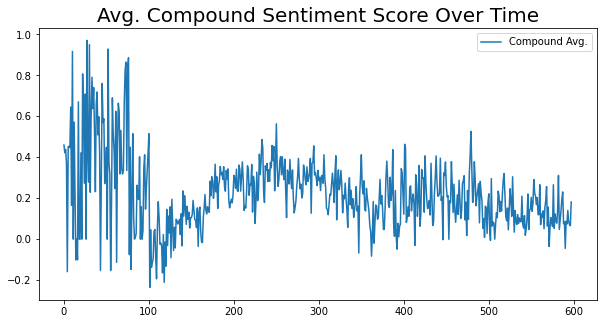

In [54]:
df_plot = df_new[['week_year', 'compound']]

%matplotlib inline
plt.figure(figsize = [10,5])
plt.title('Avg. Compound Sentiment Score Over Time', fontsize=20)
sns.lineplot(data = df_plot)
plt.legend(['Compound Avg.'])
plt.show();